In [1]:
# Install required packages.
import os
import torch
import numpy as np
import networkx as nx
import torch_geometric
from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import GNNBenchmarkDataset
from torch_geometric.utils import homophily
import csv
os.environ['TORCH'] = torch.__version__
print(torch.__version__)
from homophily_functions import get_homophily

D:\anaconda3\lib\site-packages\torch_geometric\typing.py:71: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: [WinError 127] La procédure spécifiée est introuvable
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
D:\anaconda3\lib\site-packages\torch_geometric\typing.py:109: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: [WinError 127] La procédure spécifiée est introuvable
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
D:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
D:\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.

2.2.0+cpu


## Manually 

In [2]:
dataset = TUDataset(root='data/TUDataset', name='MUTAG')

torch.manual_seed(12345)
dataset = dataset.shuffle()

train_dataset = dataset[:150]
test_dataset = dataset[150:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 150
Number of test graphs: 38


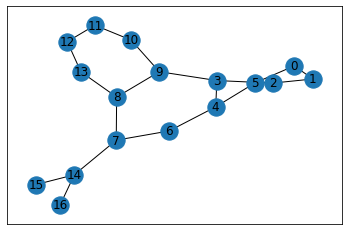

In [3]:
# To plot the graph
graph = train_dataset[0]
g = torch_geometric.utils.to_networkx(graph, to_undirected=True)
nx.draw_networkx(g)

In [4]:
# To see the features
graph.x

tensor([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]])

In [5]:
# To transform the label into int
torch.argmax(graph.x, dim=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2])

In [6]:
# Display the homophily with different formula
homophily(graph.edge_index, torch.argmax(graph.x, dim=1), method='edge')

0.8421052694320679

In [7]:
homophily(graph.edge_index, torch.argmax(graph.x, dim=1), method='node')

0.8039215803146362

In [8]:
homophily(train_dataset.edge_index, torch.argmax(train_dataset.x, dim=1), method='edge')

0.7203870415687561

In [9]:
homophily(train_dataset.edge_index, torch.argmax(train_dataset.x, dim=1), method='node')

0.6603721976280212

In [10]:
homophily(train_dataset.edge_index, torch.argmax(train_dataset.x, dim=1), method='edge_insensitive')

0.03396705910563469

## With our script

In [11]:
get_homophily(TUDataset, 'TUDataset' , 'Mutag')

Name of the dataset: Mutag
Size of the dataset: 188
Number of training graphs: 151
Number of test graphs: 37
Homophily with the edge formula (train/test): 0.721 | 0.722
Homophily with the node formula (train/test): 0.661 | 0.662
Homophily with the edge_insensitive formula (train/test): 0.034 | 0.035
CSV file created successfully: homophily_data.csv


In [12]:
get_homophily(TUDataset, 'TUDataset' , 'ENZYMES')

Processing...
Done!


Name of the dataset: ENZYMES
Size of the dataset: 600
Number of training graphs: 480
Number of test graphs: 120
Homophily with the edge formula (train/test): 0.667 | 0.66
Homophily with the node formula (train/test): 0.665 | 0.664
Homophily with the edge_insensitive formula (train/test): 0.37 | 0.399
CSV file created successfully: homophily_data.csv


In [13]:
get_homophily(TUDataset, 'TUDataset' , 'PROTEINS')

Processing...
Done!


Name of the dataset: PROTEINS
Size of the dataset: 1113
Number of training graphs: 891
Number of test graphs: 222
Homophily with the edge formula (train/test): 0.657 | 0.654
Homophily with the node formula (train/test): 0.652 | 0.648
Homophily with the edge_insensitive formula (train/test): 0.372 | 0.367
CSV file created successfully: homophily_data.csv


In [14]:
get_homophily(GNNBenchmarkDataset, 'GNNBenchmarkDataset' , 'PATTERN')

Extracting data\GNNBenchmarkDataset\PATTERN\raw\PATTERN_v2.zip
Processing...
Done!


Name of the dataset: PATTERN
Size of the dataset: 10000
Number of training graphs: 8000
Number of test graphs: 2000
Homophily with the edge formula (train/test): 0.333 | 0.333
Homophily with the node formula (train/test): 0.333 | 0.333
Homophily with the edge_insensitive formula (train/test): 0.0 | 0.0
CSV file created successfully: homophily_data.csv


In [15]:
get_homophily(GNNBenchmarkDataset, 'GNNBenchmarkDataset' , 'CLUSTER')

Extracting data\GNNBenchmarkDataset\CLUSTER\raw\CLUSTER_v2.zip
Processing...
Done!


Name of the dataset: CLUSTER
Size of the dataset: 10000
Number of training graphs: 8000
Number of test graphs: 2000
Homophily with the edge formula (train/test): 0.905 | 0.905
Homophily with the node formula (train/test): 0.901 | 0.901
Homophily with the edge_insensitive formula (train/test): 0.009 | 0.0
CSV file created successfully: homophily_data.csv


In [16]:
#Features continues
#get_homophily(GNNBenchmarkDataset, 'GNNBenchmarkDataset' , 'MNIST')

In [3]:
get_homophily(GNNBenchmarkDataset, 'GNNBenchmarkDataset' , 'CIFAR10')

Extracting data\GNNBenchmarkDataset\CIFAR10\raw\CIFAR10_v2.zip
Processing...
Done!


Name of the dataset: CIFAR10
Size of the dataset: 45000
Number of training graphs: 36000
Number of test graphs: 9000
Homophily with the edge formula (train/test): 0.779 | 0.777
Homophily with the node formula (train/test): 0.781 | 0.779
Homophily with the edge_insensitive formula (train/test): 0.646 | 0.635
CSV file created successfully: homophily_data.csv


In [22]:
#Features continues
#get_homophily(GNNBenchmarkDataset, 'GNNBenchmarkDataset' , 'TSP')

In [23]:
#No features
#get_homophily(GNNBenchmarkDataset, 'GNNBenchmarkDataset' , 'CSL')

In [5]:
csv_file = "homophily_data.csv"
# Check if the file exists
file_exists = os.path.exists(csv_file)
# Open CSV file in append mode if it exists, otherwise in write mode
mode = 'a' if file_exists else 'w'

dataset = GNNBenchmarkDataset(root='data/' + str("GNNBenchmarkDataset"), name="MNIST")
    
size_dataset = len(dataset)

line_csv = [
    {"Name_Dataset": "MNIST", "Size_dataset": size_dataset, "Seed": 12345,
     "Homophily_edge_train": None, "Homophily_edge_test": None,
     "Homophily_node_train": None, "Homophily_node_test": None,
     "Homophily_edge_insensitive_train": None, "Homophily_edge_insensitive_test": None}
        ]

# Writing to CSV file
with open(csv_file, mode, newline='') as file:
    # Define column names
    fieldnames = ["Name_Dataset", "Size_dataset", "Seed",
                      "Homophily_edge_train", "Homophily_edge_test",
                      "Homophily_node_train", "Homophily_node_test",
                      "Homophily_edge_insensitive_train", "Homophily_edge_insensitive_test"]
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    # Write header only if file is created newly
    if not file_exists or os.path.getsize(csv_file) == 0:
        writer.writeheader()


    # Write data rows
    for row in line_csv:
        writer.writerow(row)